In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('housing_price_dataset.csv')

Understanding Data

In [ ]:
df.head(20)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
5,2095,2,3,Suburb,2020,198208.803907
6,2724,2,1,Suburb,1993,343429.319110
7,2044,4,3,Rural,1957,184992.321268
8,2638,4,3,Urban,1959,377998.588152
9,1121,5,2,Urban,2004,95961.926014


In [ ]:
df.tail()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957
49999,1572,5,3,Rural,2011,221618.583218


In [ ]:
df.dtypes

,0
SquareFeet,int64
Bedrooms,int64
Bathrooms,int64
Neighborhood,object
YearBuilt,int64
Price,float64


In [ ]:
df.isnull().sum()

,0
SquareFeet,0
Bedrooms,0
Bathrooms,0
Neighborhood,0
YearBuilt,0
Price,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt',
       'Price'],
      dtype='object')

loan_percent_income memiliki korelasi tertinggi dengan diverifikasinya pinjaman

In [ ]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


Visualisasi

<Axes: >

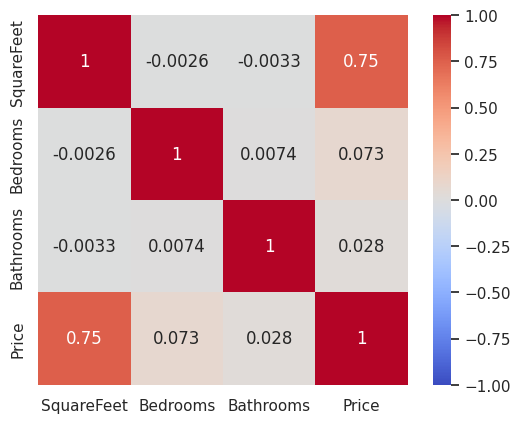

In [ ]:
from string import ascii_letters

sns.set_theme(style="white")

# Melakukan apa saja yang akan di korelasikan
corr = df[['SquareFeet','Bedrooms', 'Bathrooms', 'Price']].corr()

# Membuat heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True,vmax=1, vmin=-1)

Korelasi antara Price dengan SquareFeet paling besar, maka kita fokuskan disana

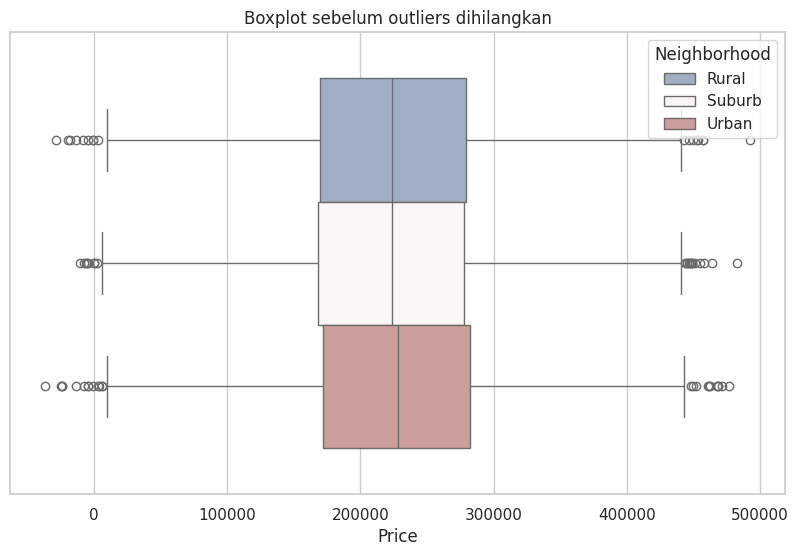

In [ ]:
# Mengatur tema untuk visualisasi
sns.set_theme(style="whitegrid")

# Membuat figure dan axis
f, ax = plt.subplots(figsize=(10, 6))

# Membuat boxplot
sns.boxplot(
    x="Price",
    hue="Neighborhood",
    data=df,
    palette="vlag"
)

# Menampilkan plot
plt.title('Boxplot sebelum outliers dihilangkan')
plt.show()

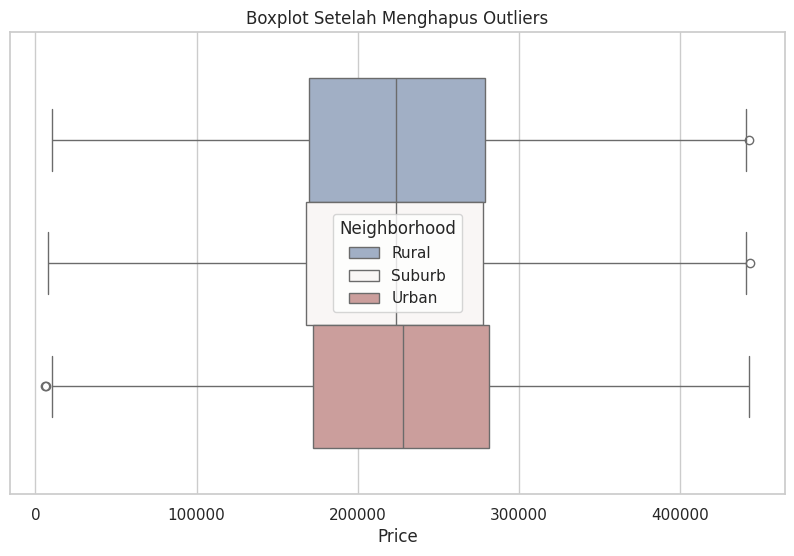

In [ ]:
# Menghitung kuartil
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas outliersnya
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menyaring outliersnya
df_filtered = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

# membuat boxplot setelah menghapus outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtered['Price'], hue="Neighborhood", data=df_filtered, palette="vlag")
plt.title("Boxplot Setelah Menghapus Outliers")
plt.show()

dari plot yang ditampilkan, kita mengetahui bahwa perbedaan harga rumah di tiap lokasi hanya berbeda sedikit.

In [ ]:
print(df_filtered.groupby('Neighborhood')['Price'].describe())

                count           mean           std           min  \
Neighborhood                                                       
Rural         16660.0  224124.288340  75737.115858  10102.388086   
Suburb        16700.0  223190.610121  75879.935694   7850.236271   
Urban         16581.0  227168.894109  75617.898221   6124.032174   

                        25%            50%            75%            max  
Neighborhood                                                              
Rural         169862.796623  223757.490457  278949.681936  442920.658166  
Suburb        168165.829456  223614.796136  277703.676346  443335.494338  
Urban         172213.721011  227879.871010  281743.488058  442623.936044  


berikut juga merupakan detail untuk harga rumah di tiap lokasi.

224573.37402372458


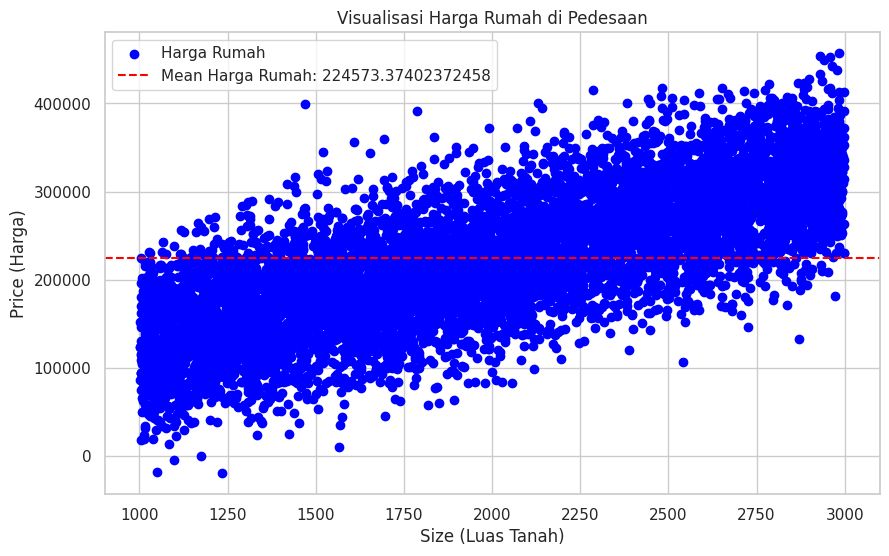

In [ ]:
filtered_df = df[(df['SquareFeet']) & (df['Neighborhood'] == 'Rural')]
mean_price = filtered_df['Price'].mean()
print(mean_price)

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['SquareFeet'], filtered_df['Price'], color='blue', label='Harga Rumah')
plt.axhline(y=mean_price, color='red', linestyle='--', label=f'Mean Harga Rumah: {mean_price}')
plt.xlabel('Size (Luas Tanah)')
plt.ylabel('Price (Harga)')
plt.title('Visualisasi Harga Rumah di Pedesaan')
plt.legend()
plt.grid(True)
plt.show()

228350.74755387596


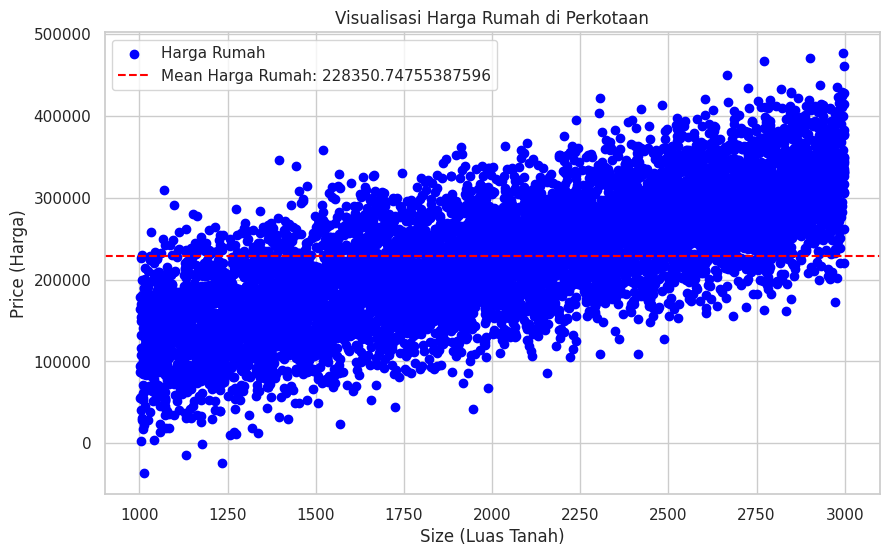

In [ ]:
filtered_df = df[(df['SquareFeet']) & (df['Neighborhood'] == 'Urban')]
mean_price = filtered_df['Price'].mean()
print(mean_price)

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['SquareFeet'], filtered_df['Price'], color='blue', label='Harga Rumah')
plt.axhline(y=mean_price, color='red', linestyle='--', label=f'Mean Harga Rumah: {mean_price}')
plt.xlabel('Size (Luas Tanah)')
plt.ylabel('Price (Harga)')
plt.title('Visualisasi Harga Rumah di Perkotaan')
plt.legend()
plt.grid(True)
plt.show()

222264.806231964


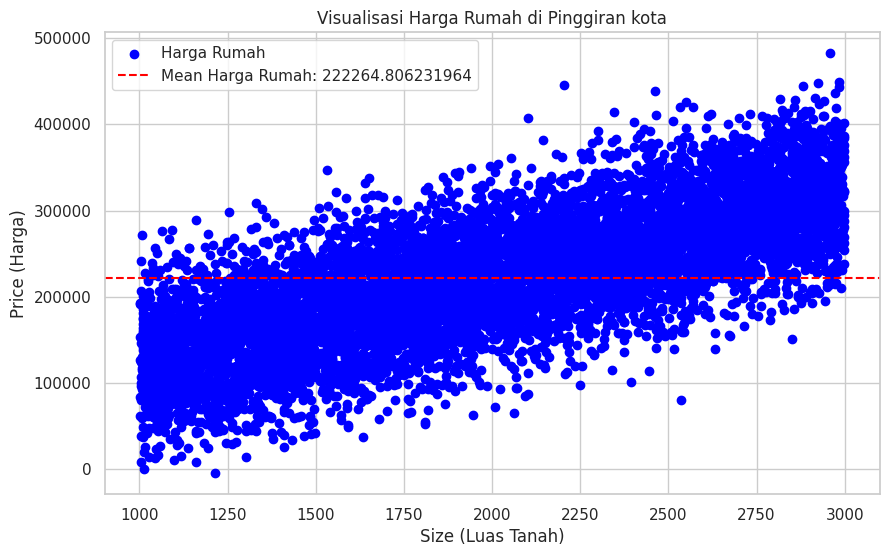

In [ ]:
filtered_df = df[(df['SquareFeet']) & (df['Neighborhood'] == 'Suburb')]
mean_price = filtered_df['Price'].mean()
print(mean_price)

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['SquareFeet'], filtered_df['Price'], color='blue', label='Harga Rumah')
plt.axhline(y=mean_price, color='red', linestyle='--', label=f'Mean Harga Rumah: {mean_price}')
plt.xlabel('Size (Luas Tanah)')
plt.ylabel('Price (Harga)')
plt.title('Visualisasi Harga Rumah di Pinggiran kota')
plt.legend()
plt.grid(True)
plt.show()

Berikut adalah persebaran data untuk masing-masing harga rumah di tiap lokasi dengan luas tanah yang berbeda - beda

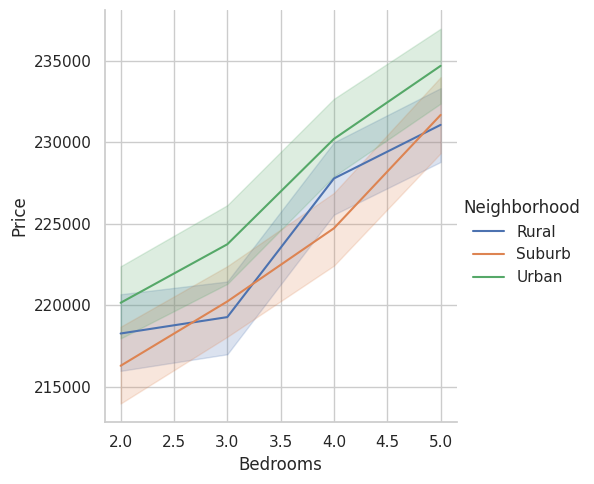

In [ ]:
sns.relplot(data=df_filtered, x='Bedrooms', y='Price', hue='Neighborhood', kind='line')

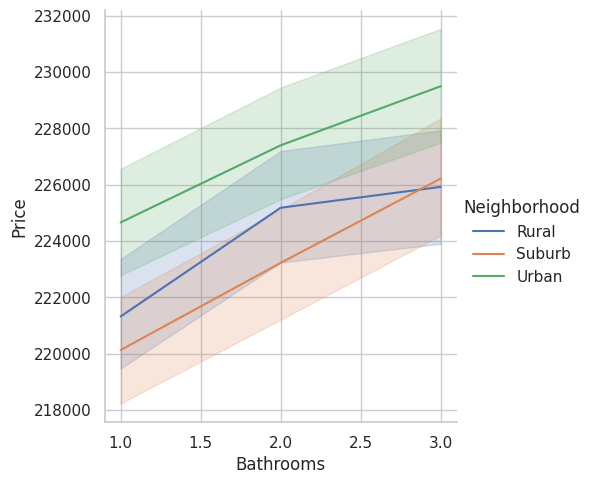

In [ ]:
sns.relplot(data=df_filtered, x='Bathrooms', y='Price', hue='Neighborhood', kind='line')

berikut juga perbedaan harga rumah berdasarkan jumlah bedrooms dan bathrooms untuk tiap lokasi yang hanya selisih sedikit.

Pre Processing


In [ ]:
df_encoded = pd.get_dummies(df, columns=['Neighborhood']) # mengubah nilai object dari fitur neighborhood menjadi numerik

In [ ]:
# Memisahkan fitur dan target
X = df_encoded.drop('Price', axis=1)  # Fitur
y = df_encoded['Price']                # Target

In [ ]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# melakukan standarisasi pada fitur numerik
scaler = StandardScaler()
X_train[['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt']] = scaler.fit_transform(X_train[['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt']])
X_test[['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt']] = scaler.transform(X_test[['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt']])

Membuat model sederhana dengan linier regression

In [ ]:
# Membuat model regresi linier
model = LinearRegression()

# Melatih model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#melakukan prediksi pada data uji
y_pred = model.predict(X_test)

In [ ]:
# mengevaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 2436249371.3072467
R^2 Score: 0.5755628630306235


Test Case :

In [ ]:
# membuat data baru untuk dilakukan tes dengan model linier regression

#membuat data
new_data_linier = pd.DataFrame({
    'SquareFeet': [1860],
    'Bedrooms': [2],
    'Bathrooms': [1],
    'YearBuilt': [1970],
    'Neighborhood_Rural': [0],
    'Neighborhood_Suburb': [1],
    'Neighborhood_Urban': [0]
})

# melakukan normalisasi pada fitur numerik
new_data_linier[['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt']] = scaler.transform(new_data_linier[['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt']])
print(new_data_linier)

# Memprediksi harga rumah dengan model linier regression
predicted_price = model.predict(new_data_linier)
print(f'Predicted Price: {predicted_price}')

   SquareFeet  Bedrooms  Bathrooms  YearBuilt  Neighborhood_Rural  \
0   -0.253742 -1.348036  -1.222072  -0.743926                   0   

   Neighborhood_Suburb  Neighborhood_Urban  
0                    1                   0  
Predicted Price: [198693.93508338]


Membuat model ensembled dengan voting regressor

In [ ]:
# membuat 2 model baru untuk digabung
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)
ranfor_model = RandomForestRegressor(n_estimators=100)


In [ ]:
# menggabungkan model liner regression, desicion tree regressor, random forest regressor
ensembled_model = VotingRegressor(estimators=[('lr', model), ('ls', lasso_model), ('rf', ranfor_model), ('el', model_elastic)])
ensembled_model.fit(X_train, y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('ls', Lasso(alpha=0.1)),
                            ('rf', RandomForestRegressor()),
                            ('el', ElasticNet(alpha=0.1))])

In [ ]:
#melakukan prediksi pada data uji
y_pred_ensembled = ensembled_model.predict(X_test)

In [ ]:
# mengevaluasi model
mse = mean_squared_error(y_test, y_pred_ensembled)
r2 = r2_score(y_test, y_pred_ensembled)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 2456076326.8730116
R^2 Score: 0.5721086615214255


Test Case :

In [ ]:
# membuat data baru untuk dilakukan tes dengan model linier regression

#membuat data
new_data_linier = pd.DataFrame({
    'SquareFeet': [1860],
    'Bedrooms': [2],
    'Bathrooms': [1],
    'YearBuilt': [1970],
    'Neighborhood_Rural': [0],
    'Neighborhood_Suburb': [1],
    'Neighborhood_Urban': [0]
})

# melakukan normalisasi pada fitur numerik
new_data_linier[['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt']] = scaler.transform(new_data_linier[['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt']])
print(new_data_linier)

# Memprediksi harga rumah dengan model linier regression
predicted_price = ensembled_model.predict(new_data_linier)
print(f'Predicted Price: {predicted_price}')

   SquareFeet  Bedrooms  Bathrooms  YearBuilt  Neighborhood_Rural  \
0   -0.253742 -1.348036  -1.222072  -0.743926                   0   

   Neighborhood_Suburb  Neighborhood_Urban  
0                    1                   0  
Predicted Price: [216988.20707296]
